# LSTM Based Sentiment Analysis of the IMdB Movie Review Dataset


In [15]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical

In [16]:
vocabulary_size = 5000
word_to_id = imdb.get_word_index()
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = vocabulary_size)
id_to_word = {i: word for word,i in word_to_id.items()}

In [17]:
print("Max review length : {}".format(len(max(train_data + test_data, key = len))))
print("Max review length : {}".format(len(min(train_data + test_data, key = len))))
print("train data : {}".format(train_data.shape))
print("test data : {}".format(test_data.shape))

Max review length : 2697
Max review length : 70
train data : (25000,)
test data : (25000,)


In [18]:
max_words = 500
XTrain = sequence.pad_sequences(train_data, maxlen=max_words)
XTest = sequence.pad_sequences(test_data, maxlen=max_words)
YTrain = to_categorical(train_label)
YTest = to_categorical(test_label)

In [19]:
embedding_size = 32
model = Sequential()

model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 213,402
Trainable params: 213,402
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(XTrain, YTrain, batch_size=256, validation_split=0.1, epochs = 4)

Train on 22500 samples, validate on 2500 samples
Epoch 1/4
22500/22500 [==============================] - 155s 7ms/step - loss: 0.6653 - acc: 0.6293 - val_loss: 0.5924 - val_acc: 0.7240
Epoch 2/4
22500/22500 [==============================] - 153s 7ms/step - loss: 0.3779 - acc: 0.8381 - val_loss: 0.3017 - val_acc: 0.8768
Epoch 3/4
22500/22500 [==============================] - 156s 7ms/step - loss: 0.2410 - acc: 0.9058 - val_loss: 0.2939 - val_acc: 0.8836
Epoch 4/4
22500/22500 [==============================] - 167s 7ms/step - loss: 0.2103 - acc: 0.9201 - val_loss: 0.3365 - val_acc: 0.8804


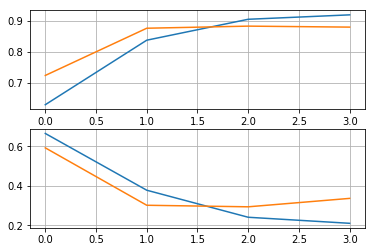

In [24]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid(True)

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid(True)

In [22]:
scores = model.evaluate(XTest, YTest, verbose=True)
print('Test accuracy:', scores[1])

25000/25000 [==============================] - 87s 3ms/step
Test accuracy: 0.87572
